## Graphic dashboard - facebook

In [2]:
import pandas as pd

def change_sign(serie: str) -> float:
    return float(serie[1:])

def lmbd(column):
    return lambda x: x[column].map(change_sign)

df = pd.read_csv(
    "data/fb.csv",
    parse_dates=["Date"],
    dayfirst=True,
    infer_datetime_format=True,
    index_col="Date",
    engine="python",

).rename(columns={
    "Close/Last": "CloseLast"
}
).sort_index().assign(
    CloseLast = lmbd("CloseLast"), 
    Open = lmbd("Open"), 
    High = lmbd("High"),
    Low = lmbd("Low"),
    CloseLast_mean = lambda x: x["CloseLast"].rolling("14D").mean(),  
)

df

,CloseLast,Volume,Open,High,Low,CloseLast_mean
Date,,,,,,
2012-05-18,38.2318,579377500,42.000,45.00,38.00,38.23180
2012-05-21,34.0300,167943600,36.530,36.66,33.00,36.13090
2012-05-22,31.0000,101667700,32.610,33.59,30.94,34.42060
2012-05-23,32.0000,73541150,31.370,32.50,31.36,33.81545
2012-05-24,33.0300,50208760,32.950,33.21,31.77,33.65836
...,...,...,...,...,...,...
2021-09-23,345.9600,21806260,345.355,349.67,343.00,364.57800
2021-09-24,352.9600,18801930,343.239,354.35,342.37,362.00500
2021-09-27,353.5800,15205840,349.805,355.15,347.08,359.71200


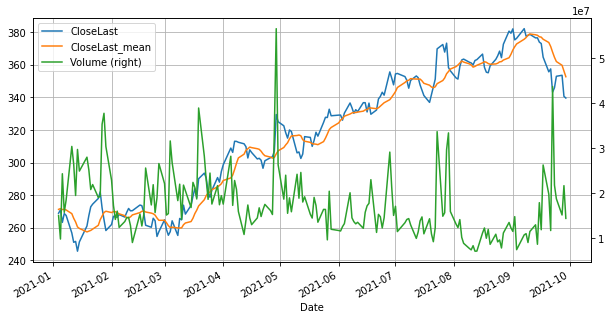

In [3]:
from_ = "2021"
to = "2022"
df.loc[from_ : to].plot(
    y = ["CloseLast", "CloseLast_mean", "Volume"],
    figsize = [10,5],
    secondary_y = ["Volume"],
    grid=True,
    
);